In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


with open('exp3_unlabeled.out') as fh:
    out = fh.read()

out = re.split(r'\n', out); out[0]

"{'kernel_df': 3, 'beta': 3, 'bayes_error': 0.0198, 'n_source': 25, 'n_target': 100, 'lipton': 0.21, 'oracle': 0.22, 'iter': 2}"

In [2]:
dict_list = [eval(d) for d in out]
df = pd.DataFrame(dict_list)

In [3]:
#df['classical-excess'] = df['classical'] - df['bayes_error']
#df['labeled-excess'] = df['labeled'] - df['bayes_error']
#df

In [4]:
df['lipton-excess'] = df['lipton'] - df['bayes_error']
df['oracle-excess'] = df['oracle'] - df['bayes_error']
df

,kernel_df,beta,bayes_error,n_source,n_target,lipton,oracle,iter,lipton-excess,oracle-excess
0,3,3,0.0198,25,100,0.21,0.22,2,0.1902,0.2002
1,3,3,0.0198,25,100,0.17,0.17,1,0.1502,0.1502
2,3,3,0.0194,25,100,0.68,0.15,14,0.6606,0.1306
3,3,3,0.0194,25,100,0.65,0.21,17,0.6306,0.1906
4,3,3,0.0212,25,100,0.24,0.24,18,0.2188,0.2188
...,...,...,...,...,...,...,...,...,...,...
1897,3,3,0.0173,12800,100,0.03,0.06,1,0.0127,0.0427
1898,3,3,0.0183,12800,100,0.08,0.03,13,0.0617,0.0117
1899,3,3,0.0200,12800,100,0.02,0.02,94,0.0000,0.0000
1900,3,3,0.0205,12800,100,0.10,0.05,34,0.0795,0.0295


In [5]:
measure = ['lipton-excess', 'oracle-excess']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std']
result = df.groupby(['n_source', 'n_target'], as_index=False).agg(agg_dict)

In [6]:
result

n_source n_target lipton-excess           oracle-excess          
                              mean       std          mean       std
0        25      100      0.360994  0.205249      0.174106  0.044036
1        50      100      0.389102  0.175153      0.157719  0.044148
2       100      100      0.278573  0.152449      0.129873  0.037072
3       200      100      0.257444  0.123411      0.103444  0.033915
4       400      100      0.174509  0.096677      0.082109  0.030232
5       800       25      0.132067  0.075231      0.057824  0.025086
6       800       50      0.132959  0.070816      0.063559  0.032876
7       800      100      0.133129  0.071289      0.062470  0.026228
8       800      200      0.131223  0.080581      0.060897  0.027057
9       800      400      0.119044  0.066119      0.065136  0.030083
10      800      800      0.119829  0.067289      0.061724  0.027417
11      800     1600      0.127037  0.076240      0.064357  0.026241
12      800     3200      0.135702  0.077600      0.064813  0.029510
13      800     6400      0.123641  0.071029      0.060024  0.027205
14      800    12800      0.128587  0.079010      0.057337  0.023040
15     1600      100      0.098574  0.054955      0.048354  0.028017
16     3200      100      0.073327  0.045946      0.033959  0.020458
17     6400      100      0.051467  0.034019      0.024592  0.022112
18    12800      100      0.039301  0.026995      0.018594  0.019711

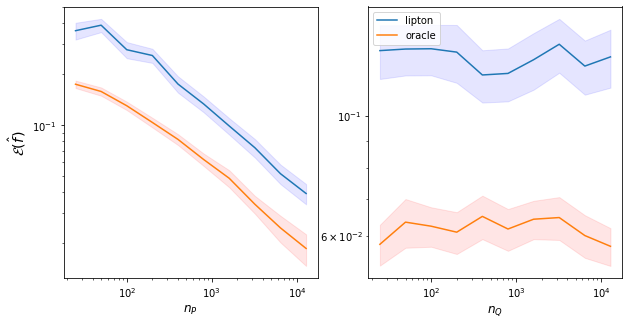

In [7]:
result1 = result.loc[result['n_target'] == 100]
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
n, mean, std = result1['n_source'], result1['lipton-excess']['mean'], result1['lipton-excess']['std']
mean_o, std_o = result1['oracle-excess']['mean'], result1['oracle-excess']['std']
l1 = ax[0].plot(n,mean)
l2 = ax[0].plot(n,mean_o)
ax[0].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[0].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[0].set_xlabel('$n_P$', size = 'large')

result2 = result.loc[result['n_source'] == 800]

n, mean, std = result2['n_target'], result2['lipton-excess']['mean'], result2['lipton-excess']['std']
mean_o, std_o = result2['oracle-excess']['mean'], result2['oracle-excess']['std']
ax[1].plot(n,mean)
ax[1].plot(n,mean_o)
ax[1].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[1].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
#ax[1].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[1].set_xlabel('$n_Q$', size = 'large')
#plt.legend(['lipton', 'oracle'], loc = 'bottom')

plt.legend(('lipton', 'oracle'), loc='middle left')
plt.show()